# Wisconsin Diagnostic Breast Cancer (WDBC)


Alumna: Sophia Escalante Rodriguez

En este estudio, me centraré en el análisis de un conjunto de datos llamado WDBC (Wisconsin Diagnostic Breast Cancer). Este dataset contiene información recopilada a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas en el pecho. Estas imágenes fueron utilizadas para extraer características que describen las propiedades de los núcleos celulares presentes en las imágenes, y estas características son utilizadas para predecir si una masa es benigna o maligna. 

Por lo tanto, el objetivo de este estudio es desarrollar y comparar tres modelos de aprendizaje automático: Bagging, Random Forest y Extra Trees, para predecir si una masa en el pecho es benigna o maligna. Además de comparar la precisión de estos modelos, también exploraré la importancia de las características mediante el uso de Random Forest.

Este problema se integra dentro del campo del aprendizaje automático, específicamente en la tarea de clasificación binaria. Las características extraídas son 30 atributos numéricos y la variable objetivo, es un valor binario. Cuando el valor es cero, indica que la muestra es benigna, mientras que un valor de uno indica que es maligno. 

## Descripción del Dataset

Para cada núcleo celular en el conjunto de datos, se calculan diez características de valor real:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

La variable objetivo del dataset es la clasificación de la muestra como benigna o maligna:

	Target (1 = malignant, 0 = benign)

In [41]:
#Importando Data y Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [23]:
#Importando conjunto de datos:
from sklearn.datasets import load_breast_cancer

# Creando el load_breast_cancer dataset como un DataFrame(qwue tambien incluya la columna "target") 
df = load_breast_cancer(as_frame=True).frame

In [26]:
# Visualizamos el dataset
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.shape

(569, 31)

In [7]:
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Revisamos si es que hay valores nulos
df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

In [12]:
# Revisar si hay valores faltantes
df.isnull().sum()
#Podemos notar que el dataset no tiene valores faltantes

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
# Revisamos cuantos nan tenemos
df.isnull().any().sum()

0

In [13]:
#Revisamos el numero y tipo de variables, si son: binarias, discretas, continuas, etc.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

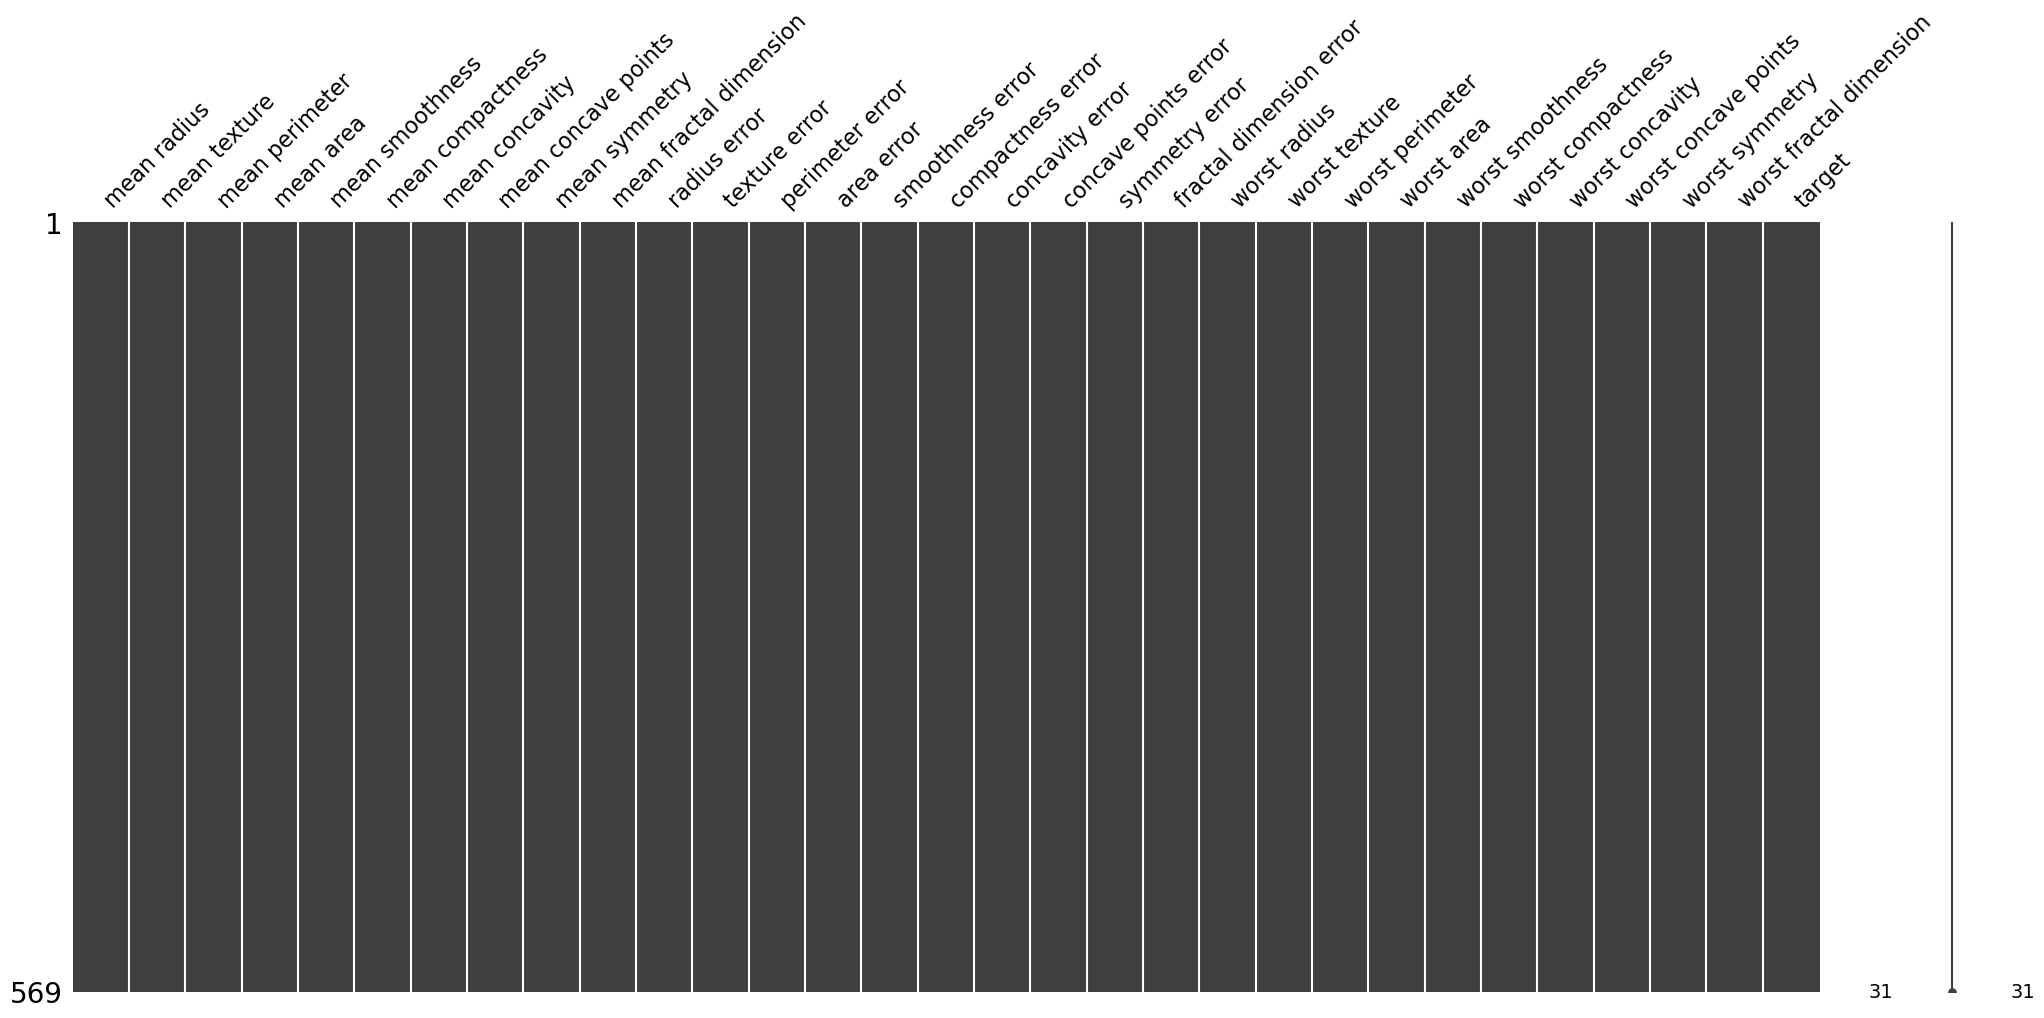

In [14]:
import missingno as msno
msno.matrix(df)

Conclusiones

-
No valores faltantes
-
Todos los tipos de variables son continuos


#### Estadisticas Descriptivas

In [29]:
# Revisamos los parametros estadisticos:
df. describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [30]:
# Revisión de la variable objetivo:
# Me mostrará la cantidad de muestras en cada categoria de la variable 'target', para conocer el balance entre ambos
df. groupby([('target')]). size()

target
0    212
1    357
dtype: int64

<Axes: xlabel='target', ylabel='count'>

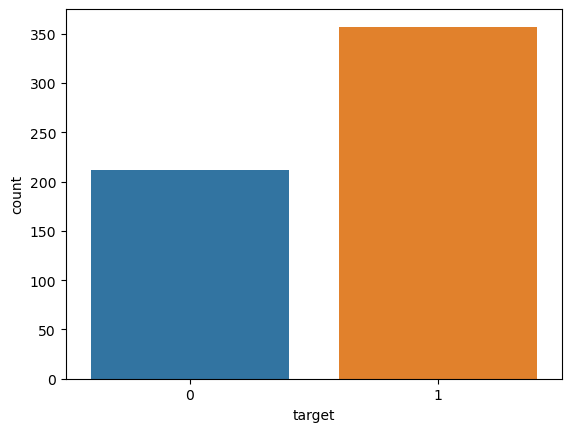

In [33]:
sns.countplot(x='target', data=df, label='count')

Conclusiones

-
La distribución de los diagnósticos muestra una mayor cantidad de casos benignos (B) que malignos (M) en proporción (357 casos benignos frente a 212 casos malignos).
-
Tenemos 569 data points, no son muchos.
-
En general, la media (mean) y la mediana (50%) son valores similares en la mayoría de las características. Esto sugiere que la distribución de los datos puede ser simétrica
-
Nos damos cuenta tambien que tenemos valores que varían ampliamente en sus medias.Por ejemplo, la característica "worst area" tiene una media de 880.583128, mientras que la característica "worst fractal dimension" tiene una media de 0.083946. Esta diferencia en las escalas de los valores puede influir al momento de entrenar el modelo, ya que algunos modelos pueden estar sesgados hacia características con valores más grandes.
En ese caso, podemos usar una técnica llamada escalamiento de datos. Una forma de escalar los datos es aplicar una transformación que lleve los valores de cada característica a un rango específico, como de 0 a 1. 
-
En general, las desviaciones estándar (std) varían entre diferentes características.


#### Analizando las correlaciones

In [42]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [43]:
mean_features = list(df.columns[:10])+ [df.columns[-1]]
corr = df[mean_features].corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838


<Axes: >

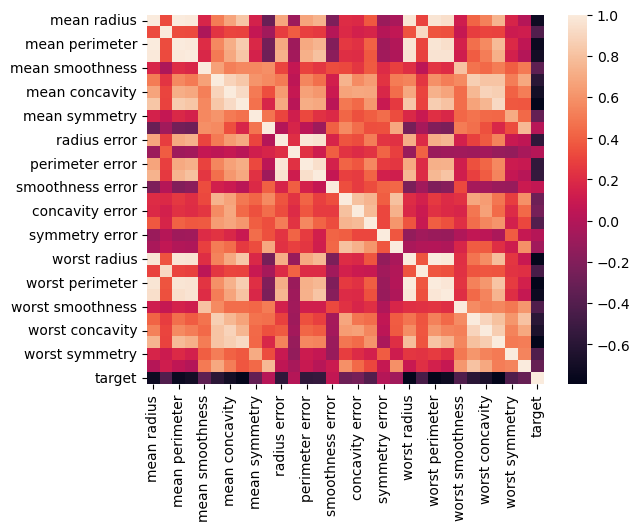

In [37]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df.corr())

Importante: 

Las correlaciones nos muestran cómo las variables están relacionadas entre sí en un conjunto de datos. Son importantes porque nos ayudan a identificar patrones, predecir valores y entender las dependencias entre variables. También nos permiten simplificar los datos al eliminar variables redundantes y seleccionar las más relevantes.

-
Por ejemplo, radius y diagnosis tiene una corelación elevada, eso implica que entrenaré mi modelo incluyendo ese feature: 'radius-mean'.
Resultarían los siguientes: 
mean radius
mean perimeter
mean area
mean compactness
mean concavity 	
mean concave points

Debemos tener en cuenta tambien que tenemos 569 data points y que si incluimos muchos features tambien podriamos terminar en un overfitting. 

### EDA

In [ ]:
sns.pairplot(df, hue="target")

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

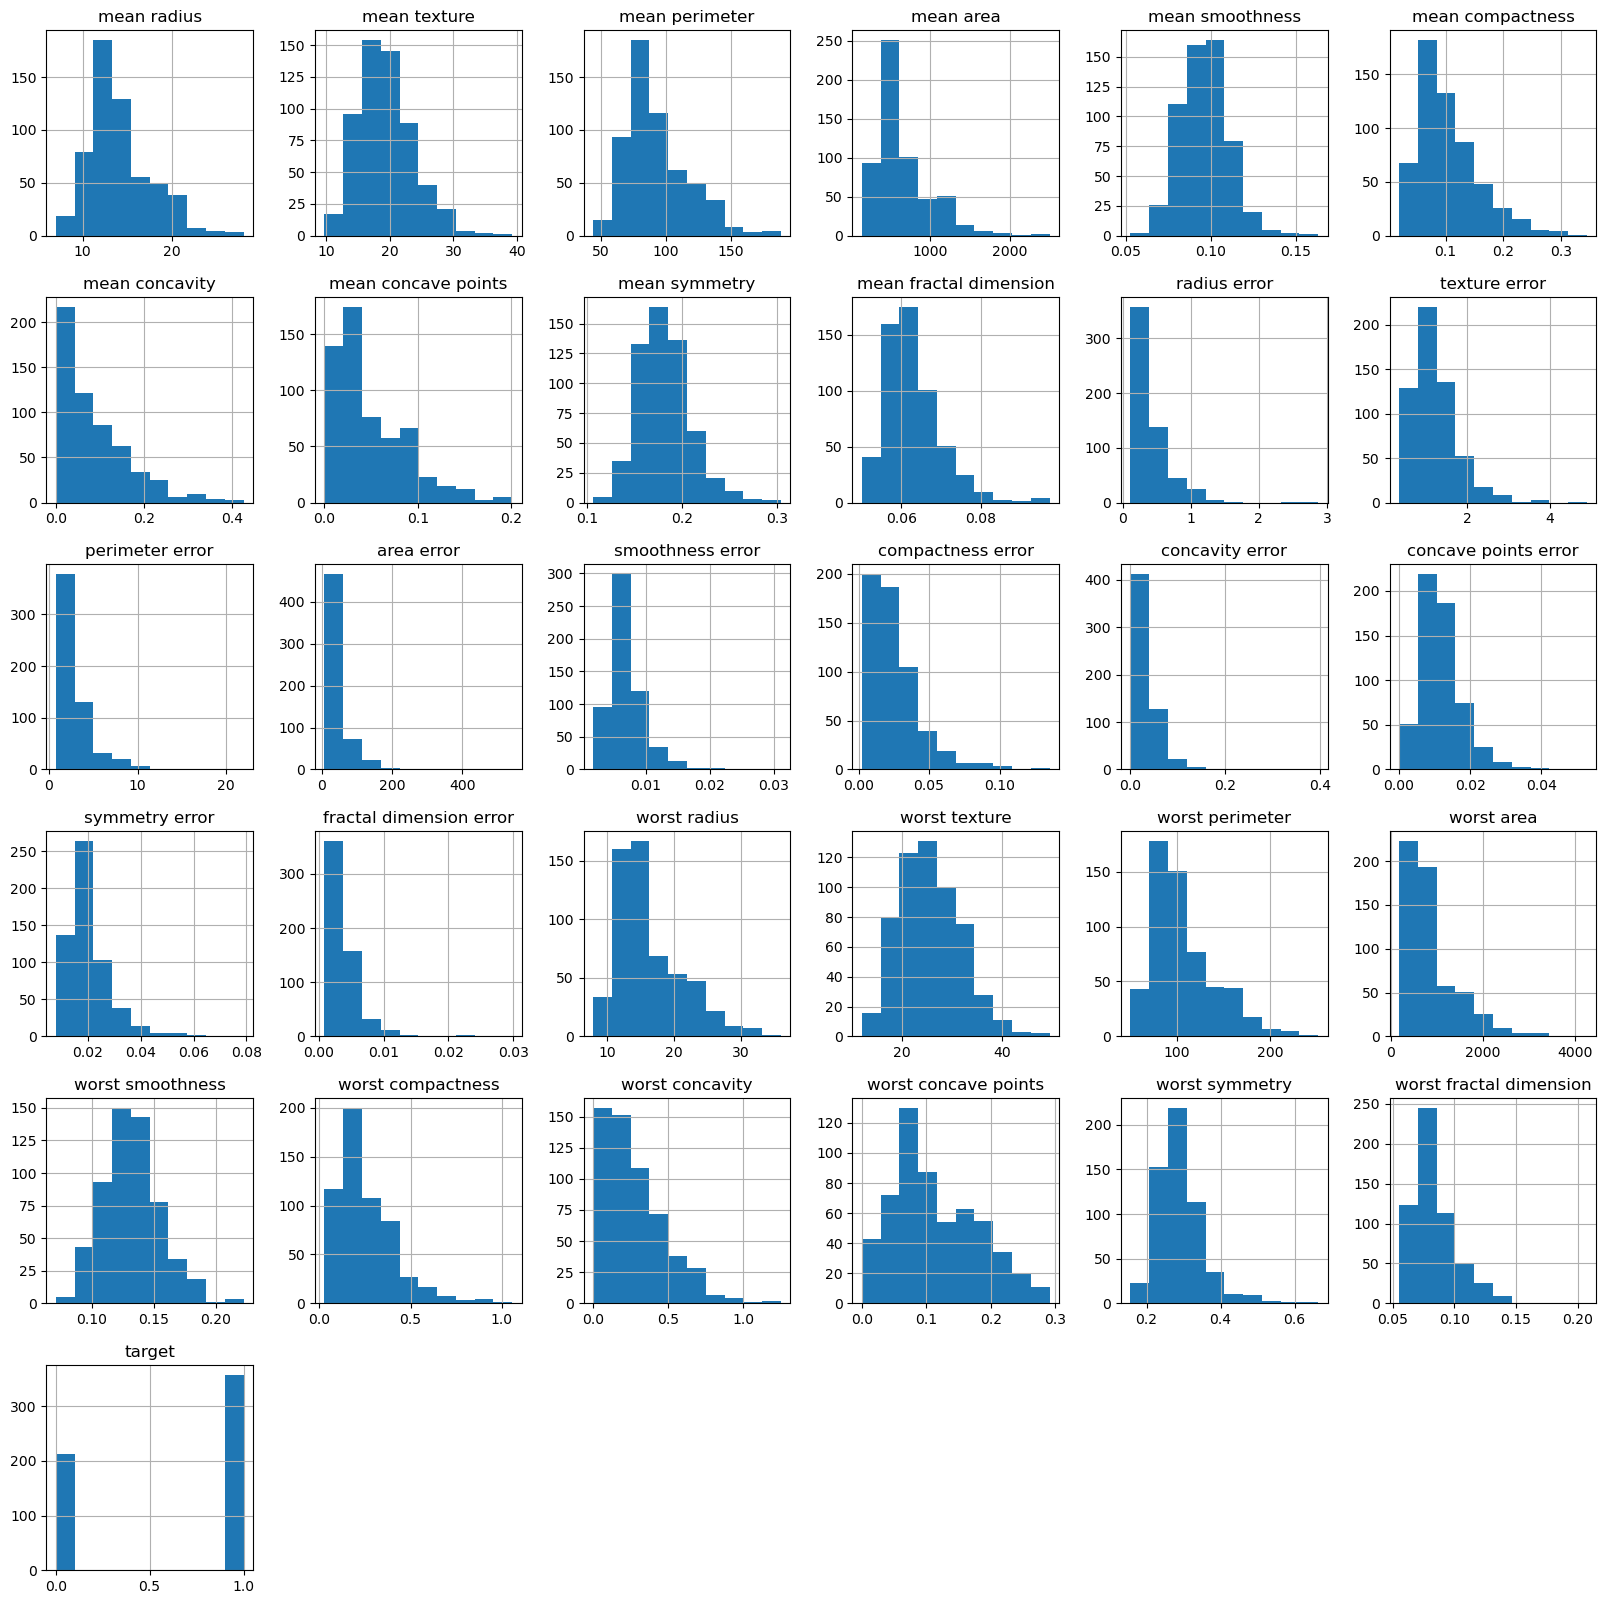

In [18]:
df.hist(figsize=(20, 20))


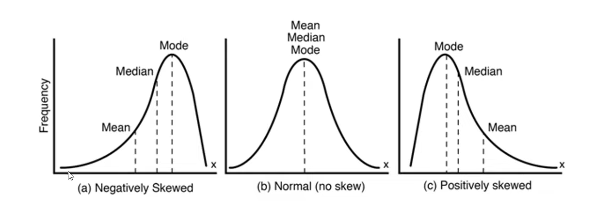

-
Hemos notado que la mayoría de las distribuciones tienen un ligero skew hacia la derecha
- 
En el caso de modelos de regresión, el sesgo hacia la derecha puede afectar negativamente el rendimiento del modelo, ya que los valores extremos pueden influir en la relación entre las variables y sesgar los resultados de las predicciones. 
-
Por otro lado, los modelos de árboles de decisión son menos sensibles al sesgo de la distribución de los datos. Estos modelos dividen los datos en diferentes grupos según los valores de las variables predictoras, y no asumen ninguna distribución específica de los datos. Aun asi si existen valores extremos es necesario tomar en cuenta eso. 

IndexError: index 4 is out of bounds for axis 0 with size 4

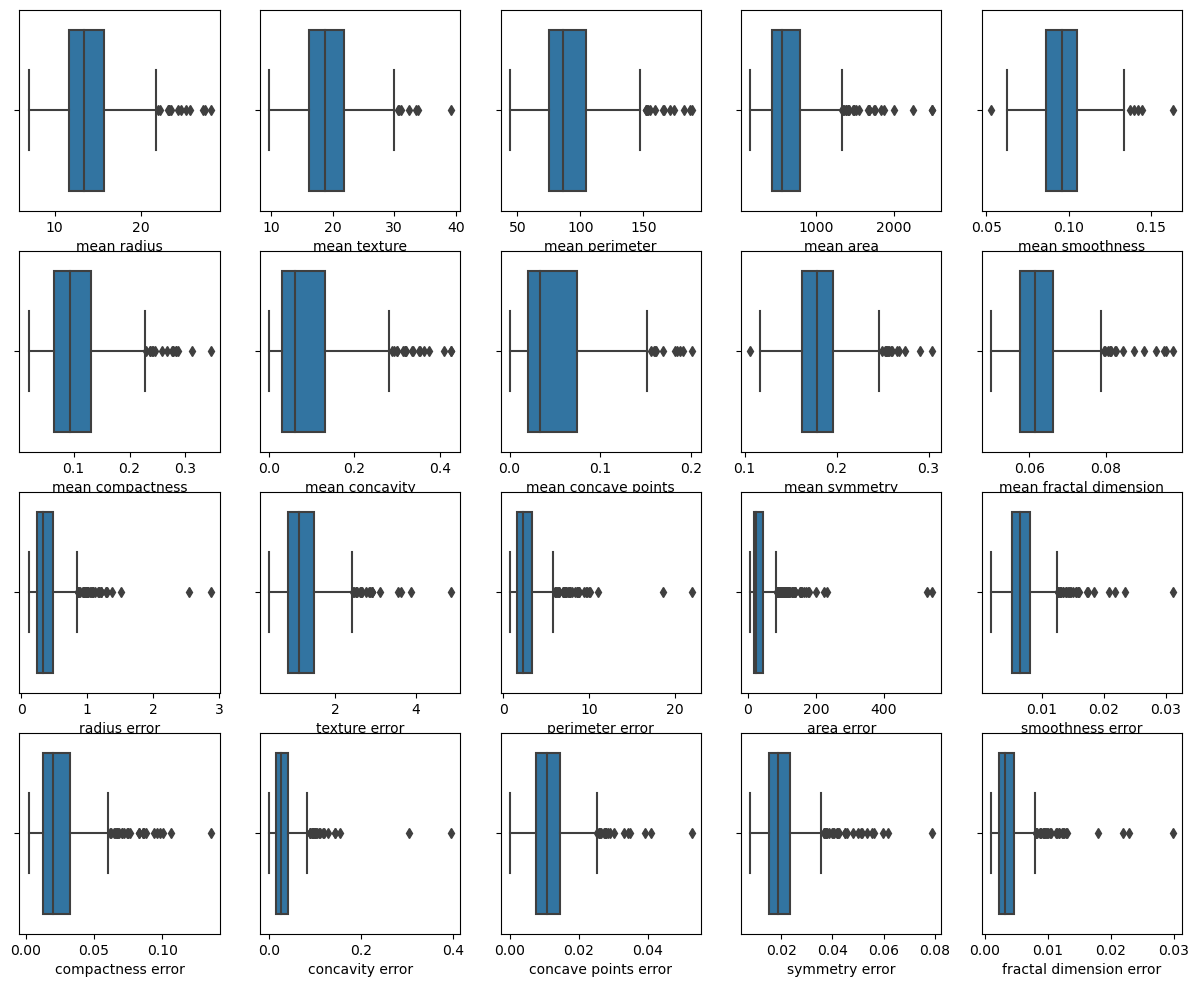

In [44]:
#Visualization of the variable distributions for each feature.

fig, ax = plt.subplots(4, 5, figsize=(15, 12))
for i, feature in enumerate(df):
    if i != 20:
        sns.boxplot(x=df[feature], ax=ax[i//5, i%5])

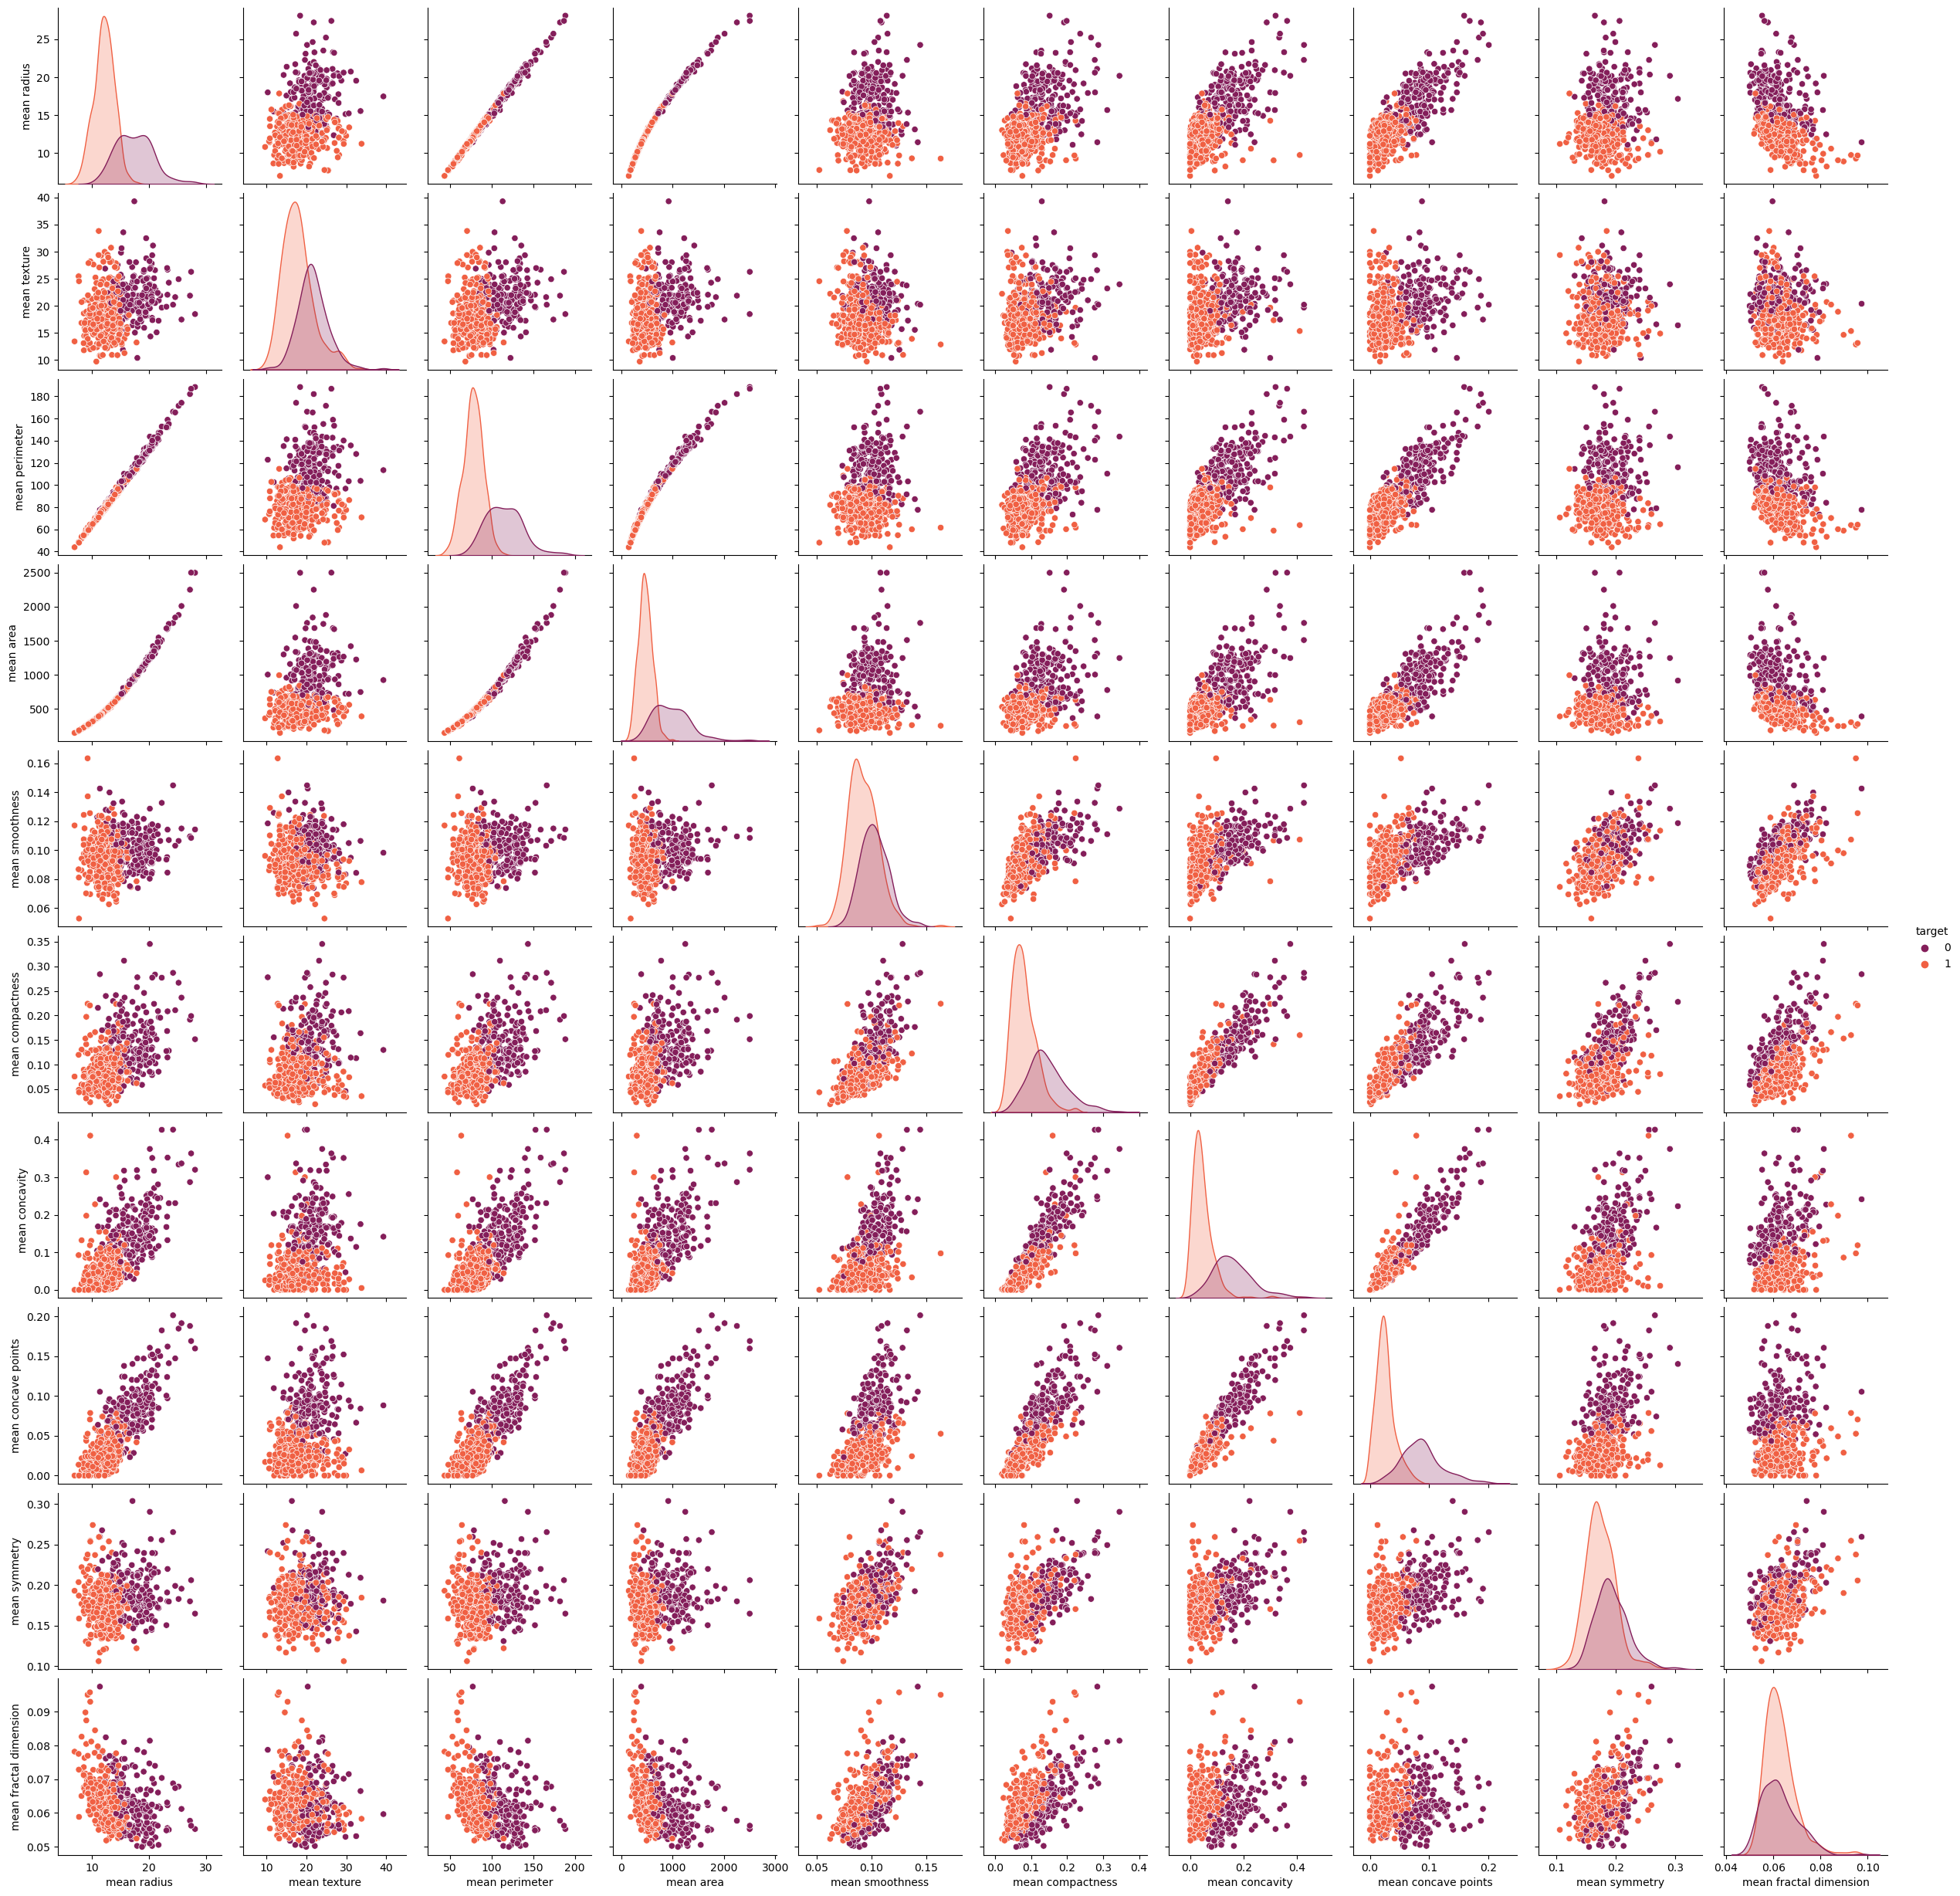

In [45]:
# ahora generamos un scatter plot solo con los mean columns
cols = ['target',
        'mean radius',
        'mean texture', 
        'mean perimeter', 
        'mean area', 
        'mean smoothness', 
        'mean compactness', 
        'mean concavity', 
        'mean concave points',
        'mean symmetry', 
        'mean fractal dimension']
sns.pairplot(data=df[cols], hue='target', palette='rocket')

Notamos que:

Los patrones casi perfectamente lineales entre las variables de radio, perímetro y área sugieren la presencia de multicolinealidad entre estas variables (están altamente relacionadas de forma lineal). Esto significa que, en general, a medida que el radio aumenta, también lo hacen el perímetro y el área de manera proporcional y predecible.


Otro conjunto de variables que posiblemente implican multicolinealidad son la concavidad, los puntos cóncavos y la compacidad.

Tener en cuenta: La presencia de multicolinealidad puede tener impactos negativos en los modelos, ya que puede dificultar la interpretación de los coeficientes y la identificación de las variables más importantes.

In [46]:
# Primero, eliminamos todas las columnas "worst"
cols = ['worst radius',
        'worst texture',  # Se eliminó el espacio en blanco al final del nombre
        'worst perimeter',
        'worst area',
        'worst smoothness',  # Se eliminó el espacio en blanco al final del nombre
        'worst compactness',
        'worst concavity',
        'worst concave points',
        'worst symmetry',  # Se eliminó el espacio en blanco al final del nombre
        'worst fractal dimension']
df3 = df.drop(cols, axis=1)

# Luego, eliminamos todas las columnas relacionadas con los atributos "perimeter" y "area"
cols = ['mean perimeter',
        'perimeter error',
        'mean area',
        'area error']
df3 = df3.drop(cols, axis=1)

# Por último, eliminamos todas las columnas relacionadas con los atributos "concavity" y "concave points"
cols = ['mean concavity',
        'concavity error',
        'mean concave points',
        'concave points error']
df3 = df3.drop(cols, axis=1)

# Verificamos las columnas restantes
df3.columns, df3.shape

(Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
        'mean symmetry', 'mean fractal dimension', 'radius error',
        'texture error', 'smoothness error', 'compactness error',
        'symmetry error', 'fractal dimension error', 'target'],
       dtype='object'),
 (569, 13))

En este caso, resolvimos la multicolinealidad, pero en realidad, los árboles de decisión son robustos frente a la multicolinealidad y no se ven afectados por ella. 
Los árboles de decisión no se ven afectados por esta correlación porque no intentan estimar coeficientes para cada variable independiente. En cambio, dividen el espacio de características en regiones basadas en umbrales óptimos, sin verse afectados por la correlación entre las variables

In [ ]:
#generamos una matriz de graficos de dispersion para visualizar las relaciones entre las diferentes variables en el dataframe
sns.pairplot(df, hue="target")

Lo que queremos hacer ahora es liminar características que presenten una alta correlación entre sí, evitando la redundancia en el conjunto de datos.

Recordar: 
La alta correlación entre dos características significa que ambas proporcionan información similar o casi idéntica sobre la variable objetivo. Esto puede generar problemas en algunos algoritmos de aprendizaje automático, como en los modelos lineales, donde la multicolinealidad puede afectar la interpretación de los coeficientes y conducir a resultados poco confiables.

In [ ]:
#Extraemos las características que tienen valores de correlación superiores a 0.9 para evitar la redundancia de información.
corr_mat = df.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

Pero haremos algo necesario: A partir del gráfico, podemos confirmar que hay tres características que tienen distribuciones similares, las cuales serán eliminadas ya que no presentan diferencias notables para la clasificación.


In [ ]:
df.drop("mean fractal dimension", inplace=True, axis=1)
df.drop("texture error", inplace=True, axis=1)
df.drop("symmetry error", inplace=True, axis=1)

In [ ]:
df.shape

## Experimentación 

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
#mencionamos previamente que necesitamos escalar
#En este caso, se establece en 0.15, lo que significa que el 15% 
#de los datos se utilizará como conjunto de prueba.
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### Se observa que las 569 imagenes se han divido en dos grupos:

    X_train: tiene una forma de (483, 30), lo que significa que hay 483 muestras en el conjunto de entrenamiento y cada muestra tiene 17 características.
    X_test: tiene una forma de (86, 30), lo que significa que hay 86 muestras en el conjunto de prueba y cada muestra tiene 17 características.
    y_train: tiene una forma de (483,), lo que significa que hay 483 etiquetas correspondientes al conjunto de entrenamiento.
    y_test: tiene una forma de (86,), lo que significa que hay 86 etiquetas correspondientes al conjunto de prueba.

### ExtraTreesClassifier con hiperparametros por defecto

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo ExtraTreesClassifier con los hiperparámetros predeterminados
etc = ExtraTreesClassifier()

# Entrenar el modelo con los datos de entrenamiento
etc.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = etc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'X_train' is not defined

In [ ]:
# Crear la matriz de confusión
cm7 = confusion_matrix(y_test, y_pred)
cm7

1. Verdaderos positivos (True Positives): Hay 30 muestras que pertenecen a la clase positiva y fueron correctamente clasificadas como positivas.
2. Falsos negativos (False Negatives): Hay 2 muestras que pertenecen a la clase positiva, pero fueron incorrectamente clasificadas como negativas.
3. Falsos positivos (False Positives): Hay 2 muestra que pertenece a la clase negativa, pero fue incorrectamente clasificada como positiva.
4. Verdaderos negativos (True Negatives): Hay 52 muestras que pertenecen a la clase negativa y fueron correctamente clasificadas como negativas.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precisión
precision = precision_score(y_test, y_pred)

# Calcular exhaustividad (recall)
recall = recall_score(y_test, y_pred)

# Calcular F1-score
f1 = f1_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)



    El modelo tiene una precisión del 96.36%, lo que indica que el 96.36% de las predicciones positivas realizadas por el modelo son correctas.

    El recall es del 98.15%, lo que significa que el modelo identifica correctamente el 98.15% de los casos positivos en los datos.

    El F1-score es una medida que combina tanto la precisión como el recall en un solo valor. En este caso, el F1-score es de 0.9724770642201834, lo que indica un buen equilibrio entre la precisión y el recall.



### ExtraTreesClassifier usando GridSearch

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#mencionamos previamente que necesitamos escalar
#En este caso, se establece en 0.15, lo que significa que el 15% 
#de los datos se utilizará como conjunto de prueba.
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

El término "ExtraTrees" se refiere a "Extremely Randomized Trees" o "Árboles Extremadamente Aleatorios". La idea principal detrás de ExtraTrees es introducir aún más aleatoriedad en la construcción de los árboles de decisión para aumentar la diversidad y reducir la varianza del modelo.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [ ]:
#Definiendo los hiperparametros que serán comparados:


etc_params = {
    "n_estimators": [50, 100, 500, 1000, 2000],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [25, 50, 75],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
}

In [ ]:
etc_model = ExtraTreesClassifier(random_state=42)

In [ ]:
gs_cv = GridSearchCV(etc_model, etc_params, cv=5, n_jobs=-1, verbose=2).fit(X, y)

In [ ]:
#Mejores hiperparametros
gs_cv.best_params_

In [ ]:
#Creando el modelo con los mejores hiperparametros
etc_tuned = ExtraTreesClassifier(**gs_cv.best_params_, random_state=42)

In [ ]:
#Entrenando al modelo
etc_tuned = etc_tuned.fit(X_train, y_train)

In [ ]:
#Metricas
y_pred = etc_tuned.predict(X_test)
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print(f"Acc: {acc:.2f} | MSE: {mse:.2f} ")

In [ ]:
import seaborn as sns

# Predecir las etiquetas de prueba
y_pred = etc_tuned.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


    Verdaderos positivos (True Positives): Hay 30 muestras que pertenecen a la clase positiva y fueron correctamente clasificadas como positivas.
    Falsos negativos (False Negatives): Hay 2 muestras que pertenecen a la clase positiva, pero fueron incorrectamente clasificadas como negativas.
    Falsos positivos (False Positives): Hay 2 muestra que pertenece a la clase negativa, pero fue incorrectamente clasificada como positiva.
    Verdaderos negativos (True Negatives): Hay 52 muestras que pertenecen a la clase negativa y fueron correctamente clasificadas como negativas.



### Random Forest con hiperparametros por defecto

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest con hiperparámetros por defecto
rf = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Crear la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando Seaborn
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Analizamos la importancia de caracteristicas del RandomForest

In [ ]:
feature_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Puntaje de Significancia de Variables")
plt.ylabel("Variables")
plt.title("Niveles de Severidad de Variables")
plt.show()



    Visualización gráfica de la importancia de las variables en el modelo de Random Forest, lo que permite identificar las variables más relevantes para la predicción.
    Si el puntaje de una variable es cercano a 0, significa que esa variable tiene poca o ninguna influencia en las predicciones del modelo. En contraste, un puntaje cercano a 0.2 indica que la variable tiene una alta importancia y contribuye significativamente a las predicciones del modelo.



### Random Forest con GridSearchCV

In [ ]:
#Definiendo los hiperparametros que serán comparados:


etc_params1 = {
    "n_estimators": [50, 100, 500, 1000, 2000],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [25, 50, 75],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
}

In [ ]:
etc_model1 = RandomForestClassifier(random_state=42)

In [ ]:
gs_cv1 = GridSearchCV(etc_model1, etc_params1, cv=5, n_jobs=-1, verbose=2).fit(X, y)

In [ ]:
#Mejores hiperparametros
gs_cv1.best_params_

In [ ]:
#Creando el modelo con los mejores hiperparametros
etc_tuned1 = RandomForestClassifier(**gs_cv1.best_params_, random_state=42)

In [ ]:
#Entrenando al modelo
etc_tuned1 = etc_tuned1.fit(X_train, y_train)

In [ ]:
#Metricas
y_pred = etc_tuned1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print(f"Acc: {acc:.2f} | MSE: {mse:.2f} ")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener la matriz de confusión
cm3 = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando Seaborn
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Conclusiones


- Tanto el ExtraTreesClassifier como el RandomForestClassifier han logrado buenos resultados en términos de precisión, recall y puntuación F1.
- Comparando el rendimiento entre el ExtraTreesClassifier y el RandomForestClassifier con hiperparámetros por defecto, el ExtraTreesClassifier ha obtenido una precisión ligeramente más alta (0.9651) en comparación con la precisión del RandomForestClassifier (0.9535).
- Al utilizar el GridSearchCV para ajustar los hiperparámetros, el ExtraTreesClassifier obtuvo mejor precisión y el RandomForestClassifier mostró una disminución en la precisión (0.95 para ExtraTreesClassifier y 0.94 para RandomForestClassifier)
- En ambos casos, tanto con hiperparámetros por defecto como con GridSearchCV, los modelos tienen un MSE bajo, lo que significa que las predicciones incorrectas son mínimas.

